In [0]:
#　ライブラリの読み込み
import matplotlib.pyplot as plt

import re, math, random # regexes, math functions, random numbers
from collections import defaultdict, Counter
from functools import partial, reduce

from google.colab import files

In [3]:
# states.txtをアップロードください
uploaded_test = files.upload()

Saving states.txt to states.txt


In [4]:
'''街データ配列　[経度, 緯度, 好きなプログラミング言語]'''
cities = [(-86.75,33.5666666666667,'Python'),(-88.25,30.6833333333333,'Python'),(-112.016666666667,33.4333333333333,'Java'),(-110.933333333333,32.1166666666667,'Java'),(-92.2333333333333,34.7333333333333,'R'),(-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),(-118.233333333333,34.05,'Java'),(-122.316666666667,37.8166666666667,'R'),(-117.6,34.05,'Python'),(-116.533333333333,33.8166666666667,'Python'),(-121.5,38.5166666666667,'R'),(-117.166666666667,32.7333333333333,'R'),(-122.383333333333,37.6166666666667,'R'),(-121.933333333333,37.3666666666667,'R'),(-122.016666666667,36.9833333333333,'Python'),(-104.716666666667,38.8166666666667,'Python'),(-104.866666666667,39.75,'Python'),(-72.65,41.7333333333333,'R'),(-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
cities = [([longitude, latitude], language) for longitude, latitude, language in cities]

In [6]:
# 各言語ごとに、散布図を作る

segments = []
points = []

# 正規表現
lat_long_regex = r"<point lat=\"(.*)\" lng=\"(.*)\""

'''
states.txtの中身↓

<state name ="Alabama" colour="#ff0000" >
  <point lat="35.0041" lng="-88.1955"/>
  <point lat="34.9918" lng="-85.6068"/>
  .
  .
  .
  
'''

with open("states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    # startswith(s)...sから始まる文字列かどうか
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)

    ''' 正規表現にマッチした文字列がある場合 '''
    if s:
        ''' groups()でマッチした文字列をタプルで取得できる '''
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

'''
segmentsデータ↓
((-88.1955, 35.0041), (-85.6068, 34.9918)),　　....

( (a, b), (c, d) ), ( (e, f), (g, h) )
'''
# アメリカの州境をプロットする関数        
def plot_state_borders(plt, color='0.8'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)
       


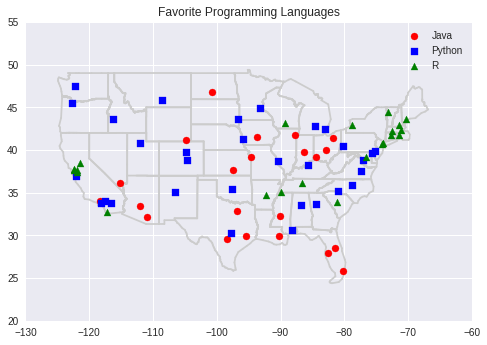

In [7]:
# アメリカ地図をプロット
plot_state_borders(plt)

    
# プロットデータの辞書オブジェクトを初期化
plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

# プロットする記号を定義
markers = { "Java" : "o", "Python" : "s", "R" : "^" }

# プロットする色を定義
colors = { "Java" : "r", "Python" : "b", "R" : "g" }

# 異なる記号で地図上にプロットするようにする処理
for (longitude, latitude), language in cities:
    plots[language][0].append(longitude)
    plots[language][1].append(latitude)
    
# 地図上に好きなプログラミングごとの点をプロット
for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                            label=language, zorder=10)
    
#plt.legend(loc="upper left") ←　左上に表示
#　凡例の表示はお任せ
plt.legend(loc=0)

# 表示域の設定
plt.axis([-130,-60,20,55])

plt.title("Favorite Programming Languages")
plt.show()

In [53]:
""" ベクトルの内積を返す """ 
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

""" ベクトルの引き算 """   
def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

""" ベクトルの二乗和 """
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

""" ベクトルの引き算 """
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

 
""" ベクトルの距離を求める関数 """
def distance(v, w):
   # sqrt...平方根をもとめる関数
   return math.sqrt(squared_distance(v, w))

In [57]:
''' 多数決する関数 '''
def majority_vote(labels):
    """近いものから順に整列している前提"""
    
    # Counter ... 辞書オブジェクトの要素を数えることが出来る
    vote_counts = Counter(labels)

    '''
    most_common([n])
    最も多い n 要素を、カウントが多いものから少ないものまで順に並べたリストを返します。 
    n が指定されなければ、 most_common() はカウンタの すべての 要素を返します。等しいカウントの要素は任意に並べられます:
    '''
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # 唯一の多数が決まったので、結果として返す
    else:
        return majority_vote(labels[:-1]) # 一番遠いデータを除外して再度実行する

''' kNNモデル '''
def knn_classify(k, labeled_points, new_point):
    """labeled_pointsは(point, label)の形になっている"""

    # ラベル付きデータポイントを近いものから順に並べ替える
    by_distance = sorted(labeled_points,
                         key=lambda point_label: distance(point_label[0], new_point))

    # 近い順にk個取り出す
    k_nearest_labels = [label for _, label in by_distance[:k]]

    # 多数決を行う
    return majority_vote(k_nearest_labels)


In [1]:
# Kの値をいくつか試してみる
#for k in [1, 3, 5, 7]:

k = 1
num_correct = 0

for location, actual_language in cities:

    other_cities = [other_city
                    for other_city in cities
                    if other_city != (location, actual_language)]
    print(other_cities)
    predicted_language = knn_classify(k, other_cities, location)
    if predicted_language == actual_language:
        num_correct += 1

print(k, "neighbor[s]:", num_correct, "correct out of", len(cities))

NameError: ignored